## Libraries

In [3]:
import pandas as pd
import numpy as np

import yfinance as yf

## Functions

In [12]:
def daySignal(day_change):
    if day_change > 0:
        return 1
    elif day_change < 0:
        return -1
    else:
        return 0

## Get Data

In [16]:
#define the ticker symbol
tickerSymbol = 'MSFT'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1D', start='2017-1-1', end='2023-1-13')

# Some calculated variables
tickerDf['day_change'] = tickerDf['Close'] - tickerDf['Open']
tickerDf['day_change_pct'] = (tickerDf['day_change'] / tickerDf['Open']) * 100
tickerDf['day_change_signal'] = tickerDf['day_change'].apply(daySignal)

#see your data
tickerDf.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,day_change,day_change_pct,day_change_signal
Date,,,,,,,,,,
2017-01-03 00:00:00-05:00,57.838818,57.884875,57.230861,57.645378,20694100,0.0,0.0,-0.193440,-0.334447,-1
2017-01-04 00:00:00-05:00,57.553258,57.801968,57.221644,57.387451,21340000,0.0,0.0,-0.165807,-0.288093,-1
2017-01-05 00:00:00-05:00,57.286124,57.719065,57.138741,57.387451,24876000,0.0,0.0,0.101327,0.176878,1
2017-01-06 00:00:00-05:00,57.387452,58.170429,57.147956,57.884872,19922900,0.0,0.0,0.497420,0.866775,1
2017-01-09 00:00:00-05:00,57.811174,58.105945,57.608525,57.700638,20382700,0.0,0.0,-0.110537,-0.191203,-1


In [17]:
tickerDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1518 entries, 2017-01-03 00:00:00-05:00 to 2023-01-12 00:00:00-05:00
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               1518 non-null   float64
 1   High               1518 non-null   float64
 2   Low                1518 non-null   float64
 3   Close              1518 non-null   float64
 4   Volume             1518 non-null   int64  
 5   Dividends          1518 non-null   float64
 6   Stock Splits       1518 non-null   float64
 7   day_change         1518 non-null   float64
 8   day_change_pct     1518 non-null   float64
 9   day_change_signal  1518 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 130.5 KB


## EDA

### Descriptive statistics

In [19]:
tickerDf.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1518.0,1.699785e+02,8.274119e+01,5.728612e+01,9.635903e+01,1.489471e+02,2.433916e+02,3.414209e+02
High,1518.0,1.717172e+02,8.366872e+01,5.771906e+01,9.718097e+01,1.530205e+02,2.456753e+02,3.464240e+02
Low,1518.0,1.681324e+02,8.174320e+01,5.706505e+01,9.541240e+01,1.477611e+02,2.406761e+02,3.390233e+02
Close,1518.0,1.700086e+02,8.274444e+01,5.738745e+01,9.642316e+01,1.507952e+02,2.433784e+02,3.399248e+02
Volume,1518.0,2.894869e+07,1.254223e+07,7.425600e+06,2.090828e+07,2.586475e+07,3.326102e+07,1.112421e+08
Dividends,1518.0,7.990777e-03,6.396157e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.800000e-01
Stock Splits,1518.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
day_change,1518.0,3.017711e-02,2.802268e+00,-1.552455e+01,-1.009312e+00,1.024580e-01,1.119345e+00,2.192025e+01
day_change_pct,1518.0,2.779145e-02,1.403093e+00,-5.924653e+00,-6.753313e-01,8.814980e-02,7.919621e-01,8.102450e+00
day_change_signal,1518.0,7.773386e-02,9.959799e-01,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Charting

### Profit/loss

<AxesSubplot: ylabel='Frequency'>

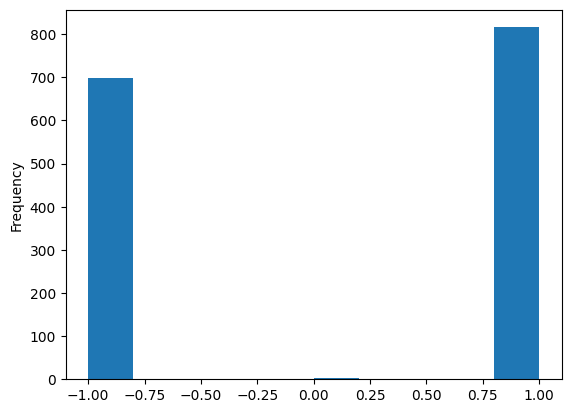

In [22]:
tickerDf['day_change_signal'].plot.hist()

<AxesSubplot: xlabel='Date'>

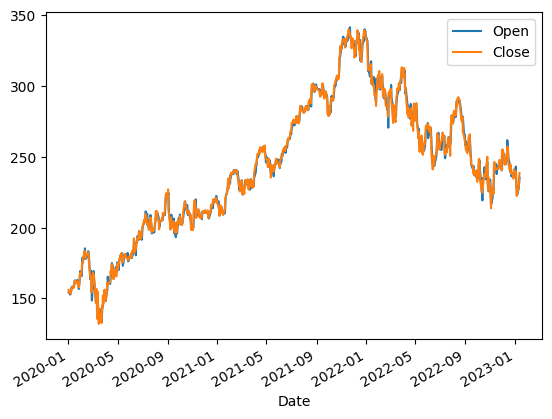

In [8]:
tickerDf[['Open', 'Close']].plot()

<AxesSubplot: xlabel='Date'>

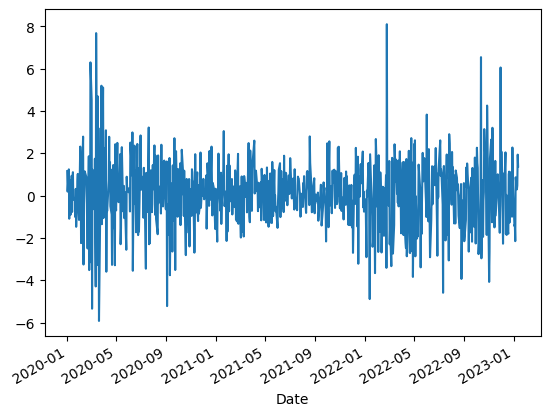

In [11]:
tickerDf['day_change_pct'].plot()